In [280]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

import env
import acquire
import prepare

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import graphviz
from graphviz import Graph

In [308]:
telco_churn = acquire.get_telco_data()
telco_df = telco_churn.copy()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [282]:
def prep_telco(df):
    '''
    This function will clean the data
    '''
    df = df.drop_duplicates()
  
    df['total_charges'] = df.total_charges.replace(' ', 0)
    df['total_charges'] = df.total_charges.astype('float64')

    dummy_df = pd.get_dummies(df[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines'
                             , 'online_security', 'online_backup', 'device_protection', 'tech_support'
                             , 'streaming_tv', 'streaming_movies', 'paperless_billing',
                             'churn', 'contract_type', 'internet_service_type', 'payment_type']],
                             dummy_na = False, drop_first = [True])

    df = pd.concat([df, dummy_df], axis = 1)
    
    cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    df = df.drop(columns = cols_to_drop)
    
    return df

In [310]:
telco_df = prep_telco(telco_df)
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,1,1,0,0,1,0,0,0,0,1
1,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,0,0,0,0,1,0,0,1,0,0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,...,0,1,0,0,1,0,0,1,0,0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,...,1,1,0,0,1,0,0,0,0,0


In [284]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [16]:
telco_df.shape

(7043, 48)

In [74]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [75]:
pd.crosstab(telco_df['churn'], telco_df['churn_Yes'])

churn_Yes,0,1
churn,,
No,5174,0
Yes,0,1869


In [76]:
pd.crosstab(telco_df['churn'], telco_df['payment_type'])

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


In [19]:
# Split the data function
def train_validate_test_split(df, target):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes)
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .25*.90= 22.5% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2,  
                                            stratify=df[target], random_state = 123)
    
    
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       stratify=train_validate[target], random_state = 123)
    return train, validate, test

In [26]:
telco_df = train_validate_test_split(telco_df, 'churn')

In [57]:
def clean_train_validate_test_telco(df, target):
    
    df = prep_telco(df)
    
    df.rename(columns={'gender_Male': 'is_male', 'partner_Yes': 'has_partner', 'dependents_Yes': 'has_dependent',
                      'churn_Yes' : 'has_churn'}, inplace=True)
    
    ## ???
    train, validate, test = train_validate_test_split(df, target)
    
    return train, validate, test

In [59]:
train, validate, test = clean_train_validate_test_telco(telco_df, 'churn')

In [51]:
print(train.shape)
print(validate.shape)
print(test.shape)

(3943, 48)
(1691, 48)
(1409, 48)


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3943 non-null   object 
 1   gender                                 3943 non-null   object 
 2   senior_citizen                         3943 non-null   int64  
 3   partner                                3943 non-null   object 
 4   dependents                             3943 non-null   object 
 5   tenure                                 3943 non-null   int64  
 6   phone_service                          3943 non-null   object 
 7   multiple_lines                         3943 non-null   object 
 8   online_security                        3943 non-null   object 
 9   online_backup                          3943 non-null   object 
 10  device_protection                      3943 non-null   object 
 11  t

# Question 1: 

Exploratory Analysis: Who was more likely to churn?

Question 1:
Is electirc checking a large cause for churn?

are electric checking payment options more likely to churn? plot barplot x-axis is electrick checking payment option and y-axis is churn rate

run chi-square test electric + churn (and the other encoded payment types)

run a t-test on electric and churn


Answer 1


In [62]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,has_churn,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5642,1982-FEBTD,Female,0,Yes,Yes,23,Yes,Yes,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0
3338,8982-NHAVY,Male,0,No,No,27,Yes,Yes,No,No,...,1,1,0,1,0,1,0,0,0,0
4273,4115-NZRKS,Female,1,No,No,7,Yes,No,No,No,...,1,1,0,0,0,1,0,0,1,0
2382,9633-DENPU,Female,0,Yes,No,47,Yes,No,No,Yes,...,0,1,0,0,0,0,0,0,0,0
2655,5693-PIPCS,Male,0,No,No,41,Yes,No,No,Yes,...,1,1,0,0,1,1,0,1,0,0


(array([ 852.,    0.,    0.,  879.,    0.,    0., 1320.,    0.,    0.,
        892.]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]), <BarContainer object of 10 artists>)


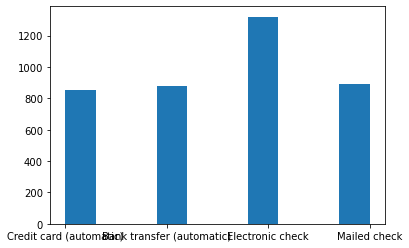

In [95]:
print(plt.hist(train['payment_type']))

(array([2623.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       1320.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <BarContainer object of 10 artists>)


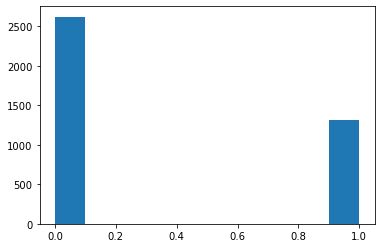

In [96]:
print(plt.hist(train['payment_type_Electronic check']))

<AxesSubplot:xlabel='payment_type', ylabel='has_churn'>

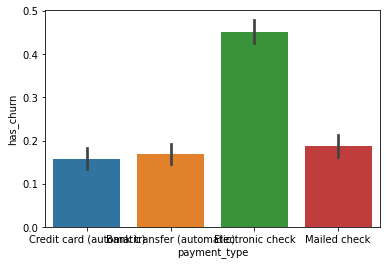

In [100]:
sns.barplot(x = 'payment_type', y = 'has_churn', data = train)

In [124]:
# Create Subset so we can see total value (bargraph data) of chunr and non churn
non_churn_subset = train[train.has_churn == 0]
churn_subset = train[train.has_churn == 1]


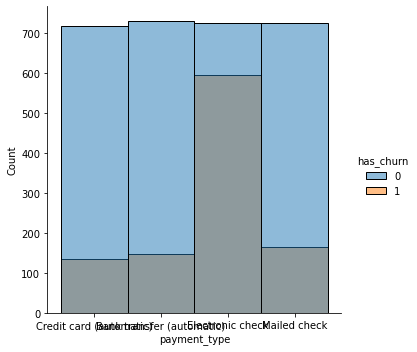

In [102]:
sns.displot(x = 'payment_type', data = train, hue = 'has_churn')

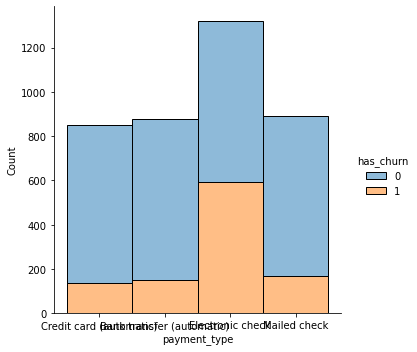

In [103]:
sns.displot(x = 'payment_type', data = train, hue = 'has_churn', alpha = 0.5, multiple = 'stack')

In [125]:
observed = pd.crosstab(train['payment_type_Electronic check'], train.has_churn)

In [127]:
chi, p, degrf, expected = stats.chi2_contingency(observed)

In [128]:
print(chi)
print(p)
print(degrf)

348.8042750712257
7.718393273725794e-78
1


In [131]:
print('Observed')
print(observed)
print("--------------------------------------")
print('---\nExpected')
print(expected)
print("--------------------------------------")
print('---\n')
print(f'chi^2 = {chi:.4f}')
print(f'p     = {p:.4f}')

Observed
has_churn                         0    1
payment_type_Electronic check           
0                              2172  451
1                               725  595
--------------------------------------
---
Expected
[[1927.16992138  695.83007862]
 [ 969.83007862  350.16992138]]
--------------------------------------
---

chi^2 = 348.8043
p     = 0.0000


In [132]:
alpha = .05

Ho: There is no assoication between eletric check and churn
    
Ha: There is an assoication between eletric check and churn

In [133]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [ ]:
Answer the first question: There is a relationship between eletric checking and churn rate

# Question 2

Is internet internet service type(Fiber Optic) a cause for churn?

<AxesSubplot:xlabel='internet_service_type', ylabel='has_churn'>

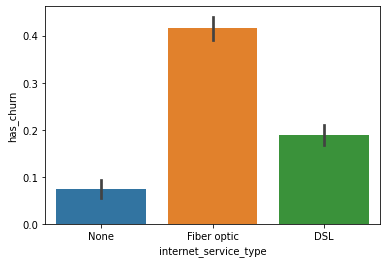

In [135]:
sns.barplot(x = 'internet_service_type', y = 'has_churn', data = train)

In [137]:
observed = pd.crosstab(train['internet_service_type_Fiber optic'], train.has_churn)
chi, p, degrf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print("--------------------------------------")
print('---\nExpected')
print(expected)
print("--------------------------------------")
print('---\n')
print(f'chi^2 = {chi:.4f}')
print(f'p     = {p:.4f}')

Observed
has_churn                             0    1
internet_service_type_Fiber optic           
0                                  1881  322
1                                  1016  724
--------------------------------------
---
Expected
[[1618.58762364  584.41237636]
 [1278.41237636  461.58762364]]
--------------------------------------
---

chi^2 = 362.0332
p     = 0.0000


Ho: There is no assoication between fiber optic and churn
    
Ha: There is an assoication between fiber optic and churn

In [139]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


There is a relationship between service type fiber optic and churn rate

# Question 3:

In [146]:
telco_df['senior_citizen'].mean()

0.1621468124378816

In [147]:
train['senior_citizen'].mean()

0.16231295967537407

<AxesSubplot:xlabel='senior_citizen', ylabel='has_churn'>

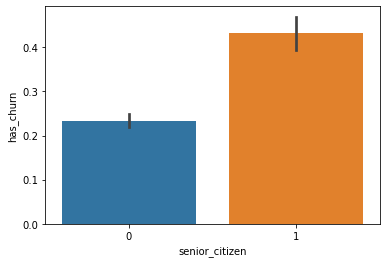

In [142]:
sns.barplot(x = 'senior_citizen', y = 'has_churn', data = train)

In [143]:
observed = pd.crosstab(train['senior_citizen'], train.has_churn)
chi, p, degrf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print("--------------------------------------")
print('---\nExpected')
print(expected)
print("--------------------------------------")
print('---\n')
print(f'chi^2 = {chi:.4f}')
print(f'p     = {p:.4f}')

Observed
has_churn          0    1
senior_citizen           
0               2533  770
1                364  276
--------------------------------------
---
Expected
[[2426.77935582  876.22064418]
 [ 470.22064418  169.77935582]]
--------------------------------------
---

chi^2 = 106.9624
p     = 0.0000


In [144]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Question 4:

<AxesSubplot:xlabel='has_dependent', ylabel='has_churn'>

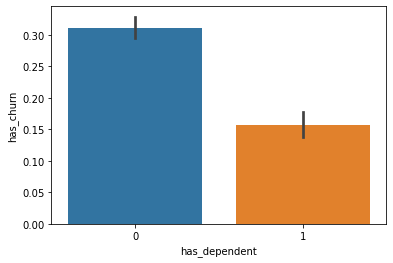

In [151]:
sns.barplot(x = 'has_dependent', y = 'has_churn', data = train)

In [152]:
observed = pd.crosstab(train['has_dependent'], train.has_churn)
chi, p, degrf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print("--------------------------------------")
print('---\nExpected')
print(expected)
print("--------------------------------------")
print('---\n')
print(f'chi^2 = {chi:.4f}')
print(f'p     = {p:.4f}')

Observed
has_churn         0    1
has_dependent           
0              1903  861
1               994  185
--------------------------------------
---
Expected
[[2030.76540705  733.23459295]
 [ 866.23459295  312.76540705]]
--------------------------------------
---

chi^2 = 100.5470
p     = 0.0000


In [154]:
train.has_churn.value_counts()

0    2897
1    1046
Name: has_churn, dtype: int64

# Decisioin Tree Model Creation

In [245]:
train['baseline'] = 0

validate['baseline'] = 0

test['baseline'] = 0

In [246]:
baseline_accuracy = (train.has_churn == train.baseline).mean()
print(f'baseline train accuracy: {baseline_accuracy:.2%}')

baseline_accuracy = (validate.has_churn == validate.baseline).mean()
print(f'baseline validate accuracy: {baseline_accuracy:.2%}')

baseline_accuracy = (test.has_churn == test.baseline).mean()
print(f'baseline test accuracy: {baseline_accuracy:.2%}')

baseline train accuracy: 73.47%
baseline validate accuracy: 73.45%
baseline test accuracy: 73.46%


In [158]:
# First model test using decision tree

In [248]:
#X_train = train.select_dtypes(exclude=['object'])

X_train = train.drop(columns = ['customer_id','gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security',
                              'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                              'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type',
                              'has_churn', 'baseline'])
y_train = train.has_churn


X_validate = validate.drop(columns = ['customer_id','gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security',
                              'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                              'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type',
                              'has_churn', 'baseline'])
y_validate = validate.has_churn

X_test = test.drop(columns=['customer_id','gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security',
                              'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                              'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type',
                              'has_churn', 'baseline'])
y_test = test.has_churn

In [257]:
clf = DecisionTreeClassifier(max_depth=3, random_state= 123)

clf = clf.fit(X_train, y_train)

In [193]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)

'telco_decision_tree.pdf'

In [258]:
clf2 = DecisionTreeClassifier(max_depth=5, random_state= 123)

clf2 = clf2.fit(X_train, y_train)

In [195]:
dot_data = export_graphviz(clf2, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree2', view=True)

'telco_decision_tree2.pdf'

In [259]:
y_pred = clf.predict(X_train)

In [260]:
y_pred2 = clf2.predict(X_train)

In [261]:
y_pred_proba = clf.predict_proba(X_train)

In [262]:
y_pred_proba2 = clf2.predict_proba(X_train)

In [263]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [264]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [265]:
confusion_matrix(y_train, y_pred)

array([[2741,  156],
       [ 669,  377]])

In [266]:
confusion_matrix(y_train, y_pred2)

array([[2532,  365],
       [ 419,  627]])

In [267]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2897
           1       0.71      0.36      0.48      1046

    accuracy                           0.79      3943
   macro avg       0.76      0.65      0.67      3943
weighted avg       0.78      0.79      0.77      3943



In [268]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2897
           1       0.63      0.60      0.62      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.74      0.74      3943
weighted avg       0.80      0.80      0.80      3943



# Rand forest model predictions and probabilites for the total test

In [314]:
telco_ids['Predictions'] = pd.DataFrame(y_pred_df)

In [326]:
probablities_df = pd.DataFrame(y_pred_proba_df)

In [336]:
telco_ids['0'] = pd.DataFrame(probablities_df[0])
telco_ids['1'] = pd.DataFrame(probablities_df[1])

# Random Forest Model Creation

In [269]:
ranf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state= 123)
ranf = ranf.fit(X_train, y_train)

In [270]:
ranf2 = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state= 123)
ranf2 = ranf2.fit(X_train, y_train)

In [271]:
y_pred = ranf.predict(X_train)

y_pred2 = ranf2.predict(X_train)

In [272]:
y_pred_proba = ranf.predict_proba(X_train)

y_pred_proba2 = ranf2.predict_proba(X_train)

In [273]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(ranf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.89


In [274]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(ranf2.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.80


In [275]:
print("Random Forest Model #1")
print("---------------------------------------------------------")
print("---------------------------------------------------------\n")
print(confusion_matrix(y_train, y_pred))

print("---------------------------------------------------------")
print("---------------------------------------------------------\n")
print(classification_report(y_train, y_pred))


print("\n\nRandom Forest Model #2")
print("---------------------------------------------------------")
print("---------------------------------------------------------\n")
print(confusion_matrix(y_train, y_pred2))

print("---------------------------------------------------------")
print("---------------------------------------------------------\n")
print(classification_report(y_train, y_pred2))

Random Forest Model #1
---------------------------------------------------------
---------------------------------------------------------

[[2768  129]
 [ 303  743]]
---------------------------------------------------------
---------------------------------------------------------

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2897
           1       0.85      0.71      0.77      1046

    accuracy                           0.89      3943
   macro avg       0.88      0.83      0.85      3943
weighted avg       0.89      0.89      0.89      3943



Random Forest Model #2
---------------------------------------------------------
---------------------------------------------------------

[[2725  172]
 [ 613  433]]
---------------------------------------------------------
---------------------------------------------------------

              precision    recall  f1-score   support

           0       0.82      0.94      0.87     

# KNN Model Creation

In [235]:
knn1 = KNeighborsClassifier()

knn1 = knn1.fit(X_train, y_train)


knn2 = KNeighborsClassifier(3)

knn2 = knn2.fit(X_train, y_train)

In [236]:
y_pred = knn1.predict(X_train)

y_pred2 = knn2.predict(X_train)

In [237]:
accuracy1 = knn1.score(X_train, y_train)
print("This is the accuracy: ", round(accuracy1, 3))


accuracy2 = knn2.score(X_train, y_train)
print("This is the accuracy: ", round(accuracy2, 3))

This is the accuracy:  0.834
This is the accuracy:  0.853


In [238]:
print("KNN Model #1")
print("---------------------------------------------------------")
print("---------------------------------------------------------\n")
print(confusion_matrix(y_train, y_pred))

print("---------------------------------------------------------")
print("---------------------------------------------------------\n")
print(classification_report(y_train, y_pred))


print("\n\nKNN Model #2")
print("---------------------------------------------------------")
print("---------------------------------------------------------\n")
print(confusion_matrix(y_train, y_pred2))

print("---------------------------------------------------------")
print("---------------------------------------------------------\n")
print(classification_report(y_train, y_pred2))

KNN Model #1
---------------------------------------------------------
---------------------------------------------------------

[[2685  212]
 [ 441  605]]
---------------------------------------------------------
---------------------------------------------------------

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2897
           1       0.74      0.58      0.65      1046

    accuracy                           0.83      3943
   macro avg       0.80      0.75      0.77      3943
weighted avg       0.83      0.83      0.83      3943



KNN Model #2
---------------------------------------------------------
---------------------------------------------------------

[[2691  206]
 [ 374  672]]
---------------------------------------------------------
---------------------------------------------------------

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2897
           1  

# Validation Testing

In [239]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf2.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [240]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf2.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1242
           1       0.57      0.58      0.57       449

    accuracy                           0.77      1691
   macro avg       0.71      0.71      0.71      1691
weighted avg       0.77      0.77      0.77      1691



#### Rand Forest Validation

In [241]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(ranf.score(X_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.80


In [242]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = ranf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1242
           1       0.66      0.52      0.58       449

    accuracy                           0.80      1691
   macro avg       0.75      0.71      0.73      1691
weighted avg       0.79      0.80      0.79      1691



#### KNN Validation

In [243]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(knn1.score(X_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.76


In [244]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = knn1.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1242
           1       0.56      0.47      0.51       449

    accuracy                           0.76      1691
   macro avg       0.69      0.67      0.67      1691
weighted avg       0.75      0.76      0.75      1691



# Test Testing

In [249]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(ranf.score(X_test, y_test)))

Accuracy of random forest classifier on training set: 0.81


In [250]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = ranf.predict(X_test)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [251]:
print(ranf.feature_importances_)

[0.01904126 0.20161542 0.12848236 0.16335325 0.01949486 0.01513281
 0.01427534 0.00484433 0.00495008 0.01831281 0.00439033 0.02762854
 0.00839509 0.0173245  0.00834809 0.01370564 0.00717423 0.03016997
 0.01229392 0.01285227 0.00895369 0.01370974 0.02421317 0.02802917
 0.05096243 0.06006399 0.01153336 0.01217986 0.04799882 0.01057069]


In [252]:
X_train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'is_male', 'has_partner', 'has_dependent', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

# Send to Csv file final Algorithm Model

In [253]:
telco_df = telco_churn.copy()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [254]:
#train['predictions'] = ranf.predict(X_train)
telco_df = prep_telco(telco_df)
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,1,1,0,0,1,0,0,0,0,1
1,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,0,0,0,0,1,0,0,1,0,0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,...,0,1,0,0,1,0,0,1,0,0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,...,1,1,0,0,1,0,0,0,0,0


# Creating a CSV for all of the predictions based off Random Forest Model 1

In [ ]:
# Using Telco_df and 'cleaning it'
telco_df.rename(columns={'gender_Male': 'is_male', 'partner_Yes': 'has_partner', 'dependents_Yes': 'has_dependent',
                      'churn_Yes' : 'has_churn'}, inplace=True)
telco_df['baseline'] = 0

X_telco_df = telco_df.drop(columns = ['customer_id','gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security',
                              'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                              'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type',
                              'has_churn', 'baseline'])
y_telco_df = telco_df.has_churn

ranf_base_data = RandomForestClassifier(max_depth= 10, min_samples_leaf = 1, random_state= 123)
ranf = ranf.fit(X_telco_df, y_telco_df)

y_pred_df = ranf.predict(X_telco_df)

y_pred_proba_df = ranf.predict_proba(X_telco_df)

# Creating Data Frame with just the ids
telco_ids = pd.DataFrame(telco_df.customer_id)

# Adding a new column with the predictions (0 churn and 1 being churn)
telco_ids['Predictions'] = pd.DataFrame(y_pred_df)


# Creating a Data Frame with the probabilities since it has 2 columsn for probablities
probablities_df = pd.DataFrame(y_pred_proba_df)


# Adding those columns to the telco_ids DataFrame to complete the csv file
telco_ids['0'] = pd.DataFrame(probablities_df[0])
telco_ids['1'] = pd.DataFrame(probablities_df[1])

In [339]:
telco_ids.to_csv('predictions.csv')